In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['review_scores_accuracy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: review_scores_accuracy
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['review_scores_accuracy'].max()
Min = Amsterdam['review_scores_accuracy'].min()
Limites = [Min, Max]
Limites

[4.56, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.4400000000000004

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.030920645078560186

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (4.56, 5, 15)
intervalos

array([4.56      , 4.59142857, 4.62285714, 4.65428571, 4.68571429,
       4.71714286, 4.74857143, 4.78      , 4.81142857, 4.84285714,
       4.87428571, 4.90571429, 4.93714286, 4.96857143, 5.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['review_scores_accuracy'] = pd.cut ( x = Amsterdam ['review_scores_accuracy'], bins = intervalos, labels = categorias )
Amsterdam['review_scores_accuracy']

0        Categoria9
1       Categoria11
2        Categoria9
3       Categoria14
4        Categoria3
           ...     
9654    Categoria11
9655    Categoria11
9656    Categoria14
9657    Categoria11
9658    Categoria11
Name: review_scores_accuracy, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['review_scores_accuracy'])
table1

,review_scores_accuracy,frequency,percentage,cumulative_perc
0,Categoria14,3532,0.365669,0.366618
1,Categoria11,2367,0.245056,0.612311
2,Categoria12,633,0.065535,0.678015
3,Categoria13,536,0.055492,0.733652
4,Categoria8,532,0.055078,0.788873
5,Categoria10,437,0.045243,0.834233
6,Categoria9,406,0.042033,0.876375
7,Categoria7,318,0.032923,0.909383
8,Categoria4,252,0.026090,0.935541
9,Categoria5,207,0.021431,0.957027


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_accuracy,frequency
0,Categoria14,3532
1,Categoria11,2367
2,Categoria12,633
3,Categoria13,536
4,Categoria8,532
5,Categoria10,437
6,Categoria9,406
7,Categoria7,318
8,Categoria4,252
9,Categoria5,207


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_accuracy')
Filtro_index

,frequency
review_scores_accuracy,
Categoria14,3532
Categoria11,2367
Categoria12,633
Categoria13,536
Categoria8,532
Categoria10,437
Categoria9,406
Categoria7,318
Categoria4,252


Text(0, 0.5, 'Frecuencia')

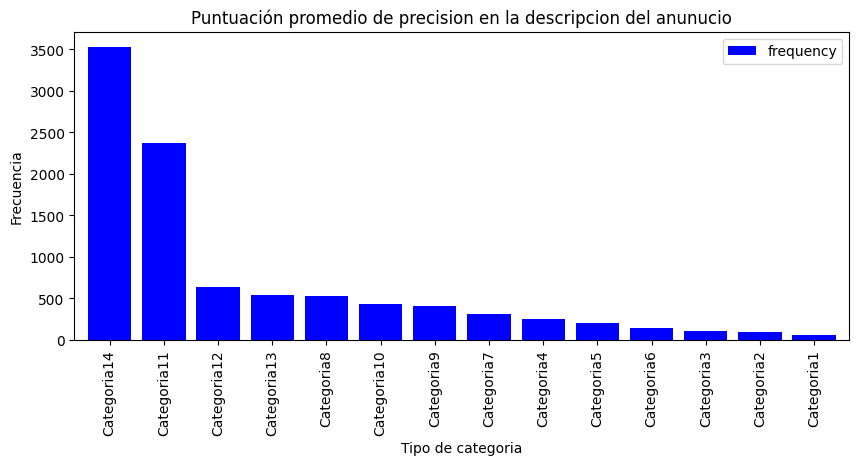

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de precision en la descripcion del anunucio')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')